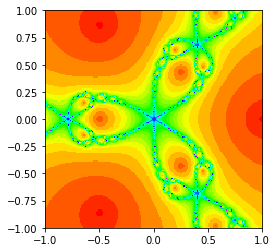

In [2]:
# example using cProfile
import matplotlib.pyplot as plt
import numpy as np

def f(x):
    return x**3 - 1

def fprime(x):
    return 3*x**2

def newton(z, f, fprime, max_iter=100, tol=1e-6):
    """The Newton-Raphson method."""
    for i in range(max_iter):
        step = f(z)/fprime(z)
        if abs(step) < tol:
            return i, z
        z -= step
    return i, z

def plot_newton_iters(p, pprime, n=200, extent=[-1,1,-1,1], cmap='hsv'):
    """Shows how long it takes to converge to a root using the Newton-Raphson method."""
    m = np.zeros((n,n))
    xmin, xmax, ymin, ymax = extent
    for r, x in enumerate(np.linspace(xmin, xmax, n)):
        for s, y in enumerate(np.linspace(ymin, ymax, n)):
            z = x + y*1j
            m[s, r] = newton(z, p, pprime)[0]
    plt.imshow(m, cmap=cmap, extent=extent)

stats = %prun -r -q plot_newton_iters(f, fprime)